<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】仮定関数

In [61]:
import numpy as np

# y=ax1+b
a = 1
b = 2
x1 = 3
y = a * x1 + b
print(y)

5


In [62]:
theta = np.array([[b], [a]])
X = np.array([[1, x1]])
y = X@theta
print(y)

[[5]]


In [63]:
def _linear_hypothesis(self, X):

    for j in range(len(self.coef_)) :
        y += self.coef_[j] * X[:, j]

    # 内積の計算
    dot_product = np.dot(X, y)
    return dot_product

##【問題2】最急降下法

In [64]:
def _gradient_descent(self, X, error):
    m = X.shape[0]
    n = X.shape[1]

    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (error[i]) * X[i][j]
        self.coef_[j] = self.coef_[j] - (self.lr / m) * gradient



In [65]:
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize coefficients (you might need to adjust this based on your needs)
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # 1. Predict using current coefficients
            pred = self.predict(X)

            # 2. Calculate the error
            error = pred - y

            # 3. Update coefficients using gradient descent
            self._gradient_descent(X, error)

            # (Optional) Calculate and store loss if verbose is True
            for i in range(self.iter):
              pred = self.predict(X)  # 学習データの予測値を得る
              self.loss[i] = self.lossfunction(pred, y)  # 学習した損失を計算して記録する

              if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)  # 検証データの予測値を得る
                self.val_loss[i] = self.lossfunction(pred_val, y_val)  # 検証した時の損失を計算して記録する
                error = pred - y  # 勾配降下の誤差を求める
                self._gradient_descent(X, error)  # アプデ

    def _gradient_descent(self, X, error):
        m = X.shape[0]
        n = X.shape[1]

        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (error[i]) * X[i][j]
            self.coef_[j] = self.coef_[j] - (self.lr / m) * gradient

##【問題3】推定

In [66]:
def predict(self, X):
    if self.bias == True:
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([bias, X])
    pred_y = self._linear_hypothesis(X)
    return pred_y

##【問題4】平均二乗誤差

In [67]:
def MSE(self,y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse

##【問題5】目的関数

In [68]:
def lossfunction(self, y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse

In [69]:
    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize coefficients (you might need to adjust this based on your needs)
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # 1. Predict using current coefficients
            pred = self.predict(X)

            # 2. Calculate the error
            error = pred - y

            # 3. Update coefficients using gradient descent
            self._gradient_descent(X, error)

            # (Optional) Calculate and store loss if verbose is True
            for i in range(self.iter):
              pred = self.predict(X)  # 学習データの予測値を得る
              self.loss[i] = self.lossfunction(pred, y)  # 学習した損失を計算して記録する

              if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)  # 検証データの予測値を得る
                self.val_loss[i] = self.lossfunction(pred_val, y_val)  # 検証した時の損失を計算して記録する
                error = pred - y  # 勾配降下の誤差を求める
                self._gradient_descent(X, error)  # アプデ

##【問題6】学習と推定

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class ScratchLinearRegression():
    def __init__(self, num_iter=5000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
           X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01  # Random init

        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")


# データの読み込み
df = pd.read_csv('/application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# データ分割と標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデル作成と学習
model = ScratchLinearRegression(num_iter=5000, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)

# 推定と評価
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

Epoch 0, Loss: 0.0823, Val Loss: 0.0792
Epoch 10, Loss: 0.0811, Val Loss: 0.0780
Epoch 20, Loss: 0.0800, Val Loss: 0.0770
Epoch 30, Loss: 0.0792, Val Loss: 0.0762
Epoch 40, Loss: 0.0785, Val Loss: 0.0755
Epoch 50, Loss: 0.0779, Val Loss: 0.0750
Epoch 60, Loss: 0.0774, Val Loss: 0.0746
Epoch 70, Loss: 0.0770, Val Loss: 0.0742
Epoch 80, Loss: 0.0767, Val Loss: 0.0739
Epoch 90, Loss: 0.0765, Val Loss: 0.0737
Epoch 100, Loss: 0.0762, Val Loss: 0.0735
Epoch 110, Loss: 0.0761, Val Loss: 0.0734
Epoch 120, Loss: 0.0759, Val Loss: 0.0732
Epoch 130, Loss: 0.0758, Val Loss: 0.0731
Epoch 140, Loss: 0.0757, Val Loss: 0.0731
Epoch 150, Loss: 0.0756, Val Loss: 0.0730
Epoch 160, Loss: 0.0756, Val Loss: 0.0729
Epoch 170, Loss: 0.0755, Val Loss: 0.0729
Epoch 180, Loss: 0.0755, Val Loss: 0.0729
Epoch 190, Loss: 0.0755, Val Loss: 0.0728
Epoch 200, Loss: 0.0754, Val Loss: 0.0728
Epoch 210, Loss: 0.0754, Val Loss: 0.0728
Epoch 220, Loss: 0.0754, Val Loss: 0.0728
Epoch 230, Loss: 0.0754, Val Loss: 0.0728
Epo

##【問題7】学習曲線のプロット

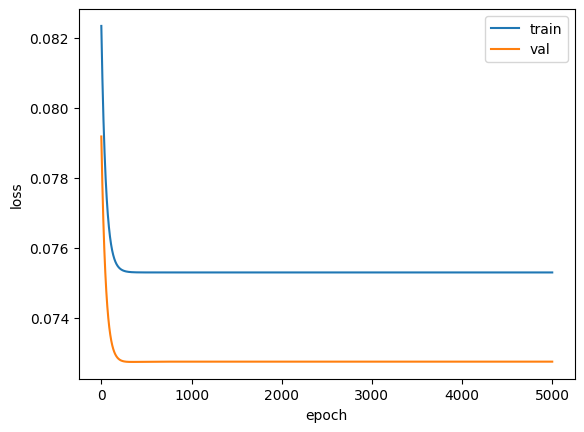

In [80]:
# self.lossとself.val_lossに記録された損失を基に、学習曲線を表示する

import matplotlib.pyplot as plt

# 学習曲線のプロット
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

##【問題8】バイアス項の除去

Epoch 0, Loss: 0.0817, Val Loss: 0.0814
Epoch 10, Loss: 0.0816, Val Loss: 0.0813
Epoch 20, Loss: 0.0816, Val Loss: 0.0813
Epoch 30, Loss: 0.0816, Val Loss: 0.0813
Epoch 40, Loss: 0.0815, Val Loss: 0.0813
Epoch 50, Loss: 0.0815, Val Loss: 0.0812
Epoch 60, Loss: 0.0815, Val Loss: 0.0812
Epoch 70, Loss: 0.0815, Val Loss: 0.0812
Epoch 80, Loss: 0.0815, Val Loss: 0.0812
Epoch 90, Loss: 0.0815, Val Loss: 0.0812
Epoch 100, Loss: 0.0815, Val Loss: 0.0812
Epoch 110, Loss: 0.0815, Val Loss: 0.0812
Epoch 120, Loss: 0.0815, Val Loss: 0.0812
Epoch 130, Loss: 0.0815, Val Loss: 0.0812
Epoch 140, Loss: 0.0815, Val Loss: 0.0812
Epoch 150, Loss: 0.0815, Val Loss: 0.0812
Epoch 160, Loss: 0.0814, Val Loss: 0.0812
Epoch 170, Loss: 0.0814, Val Loss: 0.0812
Epoch 180, Loss: 0.0814, Val Loss: 0.0812
Epoch 190, Loss: 0.0814, Val Loss: 0.0812
Epoch 200, Loss: 0.0814, Val Loss: 0.0812
Epoch 210, Loss: 0.0814, Val Loss: 0.0812
Epoch 220, Loss: 0.0814, Val Loss: 0.0812
Epoch 230, Loss: 0.0814, Val Loss: 0.0812
Epo

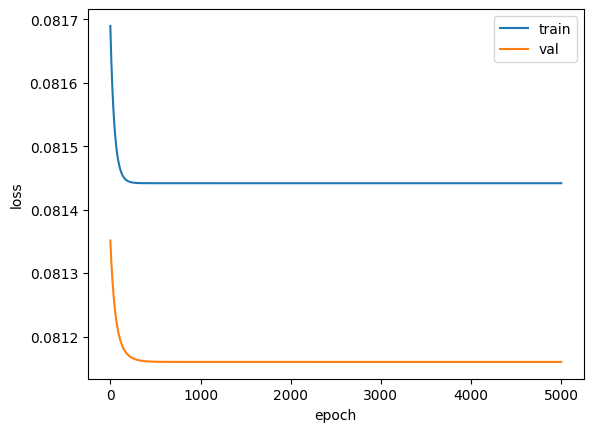

In [81]:
# これまでのコードからバイアス項を抜いて検証する

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=5000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        # バイアス項なしの処理
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        # バイアス項なしで初期化
        self.coef_ = np.random.randn(X.shape[1]) * 0.01

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")

# データの読み込み
df = pd.read_csv('/application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# データ分割と標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデル作成と学習（バイアス項なし）
model = ScratchLinearRegression(num_iter=5000, lr=0.01, no_bias=True, verbose=True) # no_bias=Trueに変更
model.fit(X_train, y_train, X_test, y_test)

# 推定と評価
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# 学習曲線のプロット
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

バイアス項で切片を示し、任意の位置に調整できるようにオフセットしたことで、より損失の少ない推定が行えていたことが分かる。
また、バイアス項の有無に関わらず最初の数百回の反復で損失にほとんど変化がない。テキストのプロット例と比較してこのプログラムの予測精度が低く、まだ改善の余地があると考えられる。

##【問題9】特徴量の多次元化

Epoch 0, Loss: 0.0818, Val Loss: 0.0794
Epoch 10, Loss: 0.0804, Val Loss: 0.0780
Epoch 20, Loss: 0.0792, Val Loss: 0.0769
Epoch 30, Loss: 0.0783, Val Loss: 0.0761
Epoch 40, Loss: 0.0776, Val Loss: 0.0754
Epoch 50, Loss: 0.0770, Val Loss: 0.0748
Epoch 60, Loss: 0.0765, Val Loss: 0.0744
Epoch 70, Loss: 0.0761, Val Loss: 0.0740
Epoch 80, Loss: 0.0758, Val Loss: 0.0738
Epoch 90, Loss: 0.0756, Val Loss: 0.0735
Epoch 100, Loss: 0.0754, Val Loss: 0.0734
Epoch 110, Loss: 0.0752, Val Loss: 0.0732
Epoch 120, Loss: 0.0751, Val Loss: 0.0731
Epoch 130, Loss: 0.0750, Val Loss: 0.0730
Epoch 140, Loss: 0.0749, Val Loss: 0.0729
Epoch 150, Loss: 0.0748, Val Loss: 0.0728
Epoch 160, Loss: 0.0747, Val Loss: 0.0728
Epoch 170, Loss: 0.0747, Val Loss: 0.0728
Epoch 180, Loss: 0.0746, Val Loss: 0.0727
Epoch 190, Loss: 0.0746, Val Loss: 0.0727
Epoch 200, Loss: 0.0746, Val Loss: 0.0727
Epoch 210, Loss: 0.0746, Val Loss: 0.0727
Epoch 220, Loss: 0.0745, Val Loss: 0.0726
Epoch 230, Loss: 0.0745, Val Loss: 0.0726
Epo

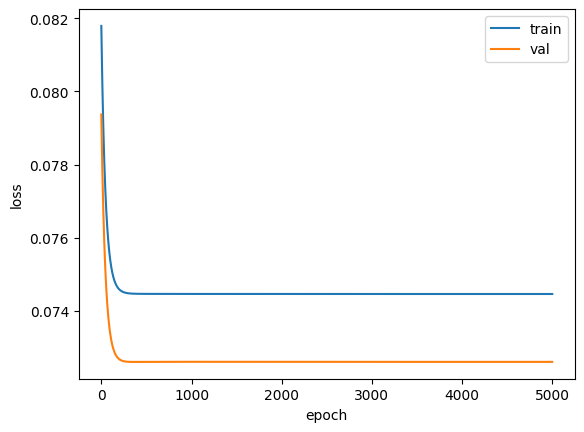

In [82]:
# 特徴量の二乗を入力に利用して、同様に推定を行う。バイアス項は入れる。

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=5000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
           X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01  # Random init

        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")

# データの読み込み
df = pd.read_csv('/application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# 特徴量の二乗を追加
X_squared = X**2
X = np.concatenate([X, X_squared], axis=1)


# データ分割と標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデル作成と学習
model = ScratchLinearRegression(num_iter=5000, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)

# 推定と評価
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# 学習曲線のプロット
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [85]:
# 特徴量の三乗を入力に利用して、同様に推定を行う。バイアス項は入れる。

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=5000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
           X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01  # Random init

        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")

# データの読み込み
df = pd.read_csv('/application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# 特徴量の三乗を追加
X_cube = X**3
X = np.concatenate([X, X_cube], axis=1)


# データ分割と標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデル作成と学習
model = ScratchLinearRegression(num_iter=5000, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)

# 推定と評価
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# 学習曲線のプロット
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Epoch 0, Loss: 0.0814, Val Loss: 0.0789
Epoch 10, Loss: 0.0801, Val Loss: 0.0778
Epoch 20, Loss: 0.0791, Val Loss: 0.0768
Epoch 30, Loss: 0.0782, Val Loss: 0.0760
Epoch 40, Loss: 0.0775, Val Loss: 0.0754
Epoch 50, Loss: 0.0770, Val Loss: 0.0749
Epoch 60, Loss: 0.0765, Val Loss: 0.0744
Epoch 70, Loss: 0.0762, Val Loss: 0.0741
Epoch 80, Loss: 0.0759, Val Loss: 0.0738
Epoch 90, Loss: 0.0756, Val Loss: 0.0736
Epoch 100, Loss: 0.0754, Val Loss: 0.0734
Epoch 110, Loss: 0.0752, Val Loss: 0.0733
Epoch 120, Loss: 0.0751, Val Loss: 0.0731
Epoch 130, Loss: 0.0750, Val Loss: 0.0730
Epoch 140, Loss: 0.0749, Val Loss: 0.0730
Epoch 150, Loss: 0.0748, Val Loss: 0.0729
Epoch 160, Loss: 0.0748, Val Loss: 0.0728
Epoch 170, Loss: 0.0747, Val Loss: 0.0728
Epoch 180, Loss: 0.0747, Val Loss: 0.0728
Epoch 190, Loss: 0.0747, Val Loss: 0.0727
Epoch 200, Loss: 0.0746, Val Loss: 0.0727
Epoch 210, Loss: 0.0746, Val Loss: 0.0727
Epoch 220, Loss: 0.0746, Val Loss: 0.0727
Epoch 230, Loss: 0.0746, Val Loss: 0.0727
Epo

AttributeError: 'builtin_function_or_method' object has no attribute 'head'

特徴量の二乗や三乗を入力に利用すると推定の精度が上がった。
今回のコードでは、二乗と三乗だと三乗の方が反復序盤の精度が高かったが、収束する値の程度には計算した限り差がなかった。